QUESTION 1 Part1: (Connie)

Is there a relationship between overall income vs. the amount of access?

Maps:
1. pie chart of total GF restaurants by price
2. pie chart of total All restaurants by price
3. bubble plot of median income
4. total number gf restaurants and by prices.


In [2]:
%matplotlib inline
#dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np

pd.set_option('display.max_columns', 500)

# File to Load 
mergedData = "Solution/AnalysisData/Final_merged_data.csv"
yelpData = "riley/summarizedYelpData.csv"
incomeData = "riley/incomebyzip.csv"

# Read the income and Yelp Data
finalMergedDataDF = pd.read_csv(mergedData)
yelpDataDF = pd.read_csv(yelpData)
incomeDataDF = pd.read_csv(incomeData)


In [3]:
yelpIncomeMerge = pd.merge(yelpDataDF,incomeDataDF, how ="left", left_on= "Zipcode", right_on ="ZipCode")
# yelpIncomeMerge.count()
# yelpIncomeMerge.head(1)

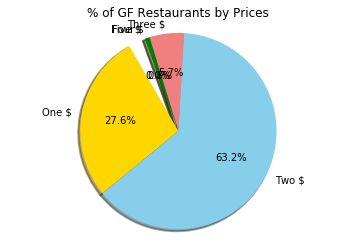

array([0.27593085, 0.63164894, 0.05651596, 0.00797872, 0.        ])

In [4]:
# Pie Chart of Total GF Restaurants by Price

gfAllNonNA = yelpIncomeMerge.dropna(how='any')
gfAllNonNA

gfAllTotal = gfAllNonNA['GF_Total'].sum()
gfAllTotal

gfPrice1 = gfAllNonNA['GF_Price_1'].sum()
gfPrice1

gfPrice2 = gfAllNonNA['GF_Price_2'].sum()
gfPrice2

gfPrice3 = gfAllNonNA['GF_Price_3'].sum()
gfPrice3

gfPrice4 = gfAllNonNA['GF_Price_4'].sum()
gfPrice4

gfPrice5 = gfAllNonNA['GF_Price_0'].sum()
gfPrice5

prices = ['One $','Two $','Three $', 'Four $', 'Five $']
gfPriceCount = [gfPrice1,gfPrice2,gfPrice3,gfPrice4,gfPrice5]
percentPrices = gfPriceCount/gfAllTotal

# Build Pie Chart
plt.title("% of GF Restaurants by Prices")
plt.pie(percentPrices, explode=(0,0,0,0,0), labels=prices, colors=["gold", "skyblue", "lightcoral", "green","orange"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('GF Restaurants PieChart.png')
plt.show()
percentPrices

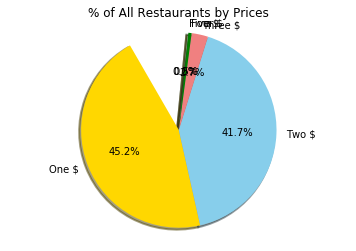

In [70]:
# Pie Chart of Total ALL Restaurants by Price

allTotal = gfAllNonNA['ALL_Total'].sum()
allTotal

allPrice1 = gfAllNonNA['ALL_Price_1'].sum()
allPrice1

allPrice2 = gfAllNonNA['ALL_Price_2'].sum()
allPrice2

allPrice3 = gfAllNonNA['ALL_Price_3'].sum()
allPrice3

allPrice4 = gfAllNonNA['ALL_Price_4'].sum()
allPrice4

allPrice5 = gfAllNonNA['ALL_Price_0'].sum()
allPrice5

prices2 = ['One $','Two $','Three $', 'Four $', 'Five $']
allPriceCount = [allPrice1, allPrice2, allPrice3, allPrice4, allPrice5]
allpercentPrices = allPriceCount/allTotal

# Build Pie Chart
plt.title("% of All Restaurants by Prices")
plt.pie(allpercentPrices, explode=(0,0,0,0,0), labels=prices2, colors=["gold", "skyblue", "lightcoral", "green","orange"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('All Restaurants PieChart.png')
plt.show()

In [71]:
# finalMergedDataDF.sort_values(by='Median family income', ascending=True)
# finalMergedDataDF.head()
# finalMergedDataDF.dtypes
# format
# finalMergedDataDF['Median family income'] = finalMergedDataDF['Median family income'].map("${:,.0f}".format)
# finalMergedDataDF['Percent of households with income over $200,000'] = finalMergedDataDF['Percent of households with income over $200,000'].map("{:.2f}%".format)

In [72]:
# Display the data table for preview
finalMergedDataDF.head()

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000"
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093


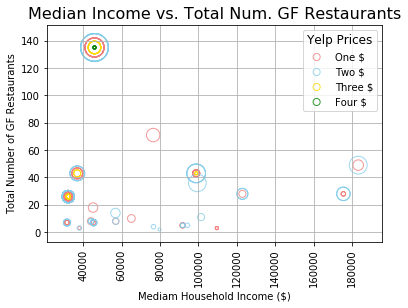

In [73]:
#Figure of GF restaurants and mean income

# Obtain the x and y coordinates for each of the three city types
# for guide on bubble plots
# https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/
# https://pythonspot.com/matplotlib-scatterplot/

# filter (locate) dataframes by each Price types.
dollar1 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $'] , ['Median family income','Total GF Rest', 'Total Number GF $']]
dollar2 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$'], ['Median family income','Total GF Rest', 'Total Number GF $$']]
dollar3 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$']]
dollar4 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$$']]

# Build the scatter plots for each price types
# Incorporate the other graph properties
# s is the z axis for getting driver count size(circle sizes
dollar1_plot = plt.scatter(dollar1['Median family income'], dollar1['Total GF Rest'], s=dollar1['Total Number GF $']*10, c='lightcoral', alpha=0.8, edgecolors="lightcoral", label='One $', linewidth=1)
dollar2_plot = plt.scatter(dollar2['Median family income'], dollar2['Total GF Rest'], s=dollar2['Total Number GF $$']*10, c='skyblue', alpha=0.8, edgecolors="skyblue", label='Two $', linewidth=1)
dollar3_plot = plt.scatter(dollar3['Median family income'], dollar3['Total GF Rest'], s=dollar3['Total Number GF $$$']*10, c='gold', alpha=0.8, edgecolors="gold", label='Three $', linewidth=1)
dollar4_plot = plt.scatter(dollar4['Median family income'], dollar4['Total GF Rest'], s=dollar4['Total Number GF $$$$']*10, c='green', alpha=0.8, edgecolors="green", label='Four $', linewidth=1)

dollar1_plot.set_facecolor("none")
dollar2_plot.set_facecolor("none")
dollar3_plot.set_facecolor("none")
dollar4_plot.set_facecolor("none")
plt.xticks(rotation='vertical')


#regression
# (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_axis, y)
# print("r-squared: %f" % r_value**2)
# fit = slope * x_axis + intercept
# # Set line
# (slope, intercept, _, _, _) = linregress(x_axis, y)
# fit = slope * x_axis + intercept
# # Plot data
# fig, ax = plt.subplots()
# ax.plot(x_axis, y, linewidth=0, marker='o')
# ax.plot(x_axis, fit,alpha = 0.8,linestyle = '--', color="red")




# Create a legend
legend = plt.legend(handles=[dollar1_plot, dollar2_plot, dollar3_plot,dollar4_plot],title='Yelp Prices',prop={'size':10}, loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]
legend.legendHandles[3]._sizes =[50]
legend.get_title().set_fontsize('12')

plt.grid(b=True)
plt.title('Median Income vs. Total Num. GF Restaurants', loc="center",fontdict={'fontsize':16})
plt.ylabel('Total Number of GF Restaurants')
plt.xlabel('Mediam Household Income ($)')


# Save Figure
save = plt.savefig('MedianIncome_TotalGF.png')

# Show the chart
plt.show()

